In [1]:
import pandas as pd

df=pd.read_csv("/content/drive/MyDrive/Dataset_S022Final.csv")

In [2]:
df=df[['Next_Current_diff','Next_Pre_diff','SNext_Current_diff','SNext_Pre_diff','rcvdPK','duration(ms)','packet_type','droppedPKWrongPort','sentPK','size','channel','DataQueueLen','passedUpPk','rcvdPKFromHL','rcvdPKFromLL','sentDownPK','DropPKByQueue','snir','throughput','label']]

In [ ]:
df1=df.sample(n=30000)
df1

,Event,sendTime,prev_event_time,next_event_time,Next_Current_diff,Next_Pre_diff,SNext_Current_diff,SNext_Pre_diff,sender,reciever,...,DropPKByQueue,passedUpPk,rcvdPK,rcvdPKFromHL,rcvdPKFromLL,sentDownPK,sentPK,snir,throughput,label
442378,256566,267.443924,267.443491,267.446930,0.018540,0.021029,3.000839e-05,1.297399e-05,satellite[1],EndUser[16],...,0.000000,0.119274,0.708411,0.144577,0.001742,0.211061,0.017478,0.534316,0.012755,Normal
116434,1442305,99.508805,99.508731,99.509202,0.002449,0.002880,3.857763e-06,9.238214e-06,satellite[0],satellite[2],...,0.000000,0.197138,0.028312,0.815745,0.007976,0.480911,0.136247,0.675468,0.429104,DDOS_UDP_FLOOD
285422,875847,166.007466,166.000593,166.008941,0.009099,0.051048,1.770859e-05,3.203783e-05,satellite[1],satellite[2],...,0.000000,0.024271,0.080389,0.035587,0.000433,0.060016,0.001891,0.375298,0.011759,Normal
66256,823703,78.391277,78.390802,78.391285,0.000050,0.002954,7.943444e-08,1.979112e-06,satellite[1],satellite[2],...,0.000000,0.117316,0.078322,0.285167,0.001164,0.232481,0.045550,0.675468,0.010359,Normal
324407,1351801,189.120010,189.119920,189.120850,0.005181,0.005686,2.253981e-05,1.428724e-05,satellite[1],EndUser[10],...,0.000000,0.018952,0.088655,0.028375,0.000369,0.051085,0.002105,0.375298,0.013641,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97637,1211358,95.081469,95.081171,95.082080,0.003767,0.005559,1.155709e-05,5.632526e-06,satellite[1],EndUser[17],...,0.000000,0.187275,0.086588,0.762981,0.008226,0.640176,0.139062,0.675468,0.480014,Normal
25185,315120,29.724836,29.724209,29.724995,0.000979,0.004806,1.542547e-06,3.330724e-06,satellite[1],EndUser[19],...,0.000000,0.138879,0.533168,0.151526,0.001937,0.256527,0.013016,0.578251,0.013610,Normal
435348,142738,259.587577,259.587396,259.587667,0.000557,0.001660,6.274134e-06,3.535838e-06,satellite[0],satellite[2],...,0.000000,0.069234,0.327340,0.092993,0.001618,0.209270,0.009958,0.534316,0.015824,Normal
142478,1762945,105.682998,105.682983,105.683033,0.000216,0.000304,3.395913e-07,1.828860e-07,satellite[1],satellite[2],...,0.000000,0.466483,0.048977,0.613789,0.007262,0.553244,0.108771,0.675468,0.387692,DDOS_UDP_FLOOD


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.src.utils.np_utils import to_categorical
# Load the dataset
data = df
# Preprocessing
data = data.dropna()  # Drop rows with missing values


# Extract features and target variable
X = data.drop('label', axis=1)
y = data['label']

X = pd.get_dummies(X)  # One-hot encode categorical variables



label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['label'])

# Scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Encode the target variable
encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)
dummy_y = to_categorical(encoded_y)

# Train-test split
#X_train, X_test, y_train, y_test = train_test_split(X, dummy_y, test_size=0.2, random_state=42)


X_train, X_temp, y_train, y_temp = train_test_split(X, dummy_y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Reshape input data to 3D for LSTM
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_val = X_val.reshape(X_val.shape[0], 1, X_val.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [4]:
X_train.size

6824097

In [5]:
X_val.size

1462316

In [6]:
X_test.size

1462316

In [8]:
# Reshape input data to 3D for LSTM
#X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
#X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(50, activation='relu'))
model.add(Dense(len(np.unique(y)), activation='softmax'))  # Adjust based on the number of classes in the target


#Compile
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model with validation data
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_val, y_val), verbose=2)



Epoch 1/5
5612/5612 - 32s - loss: 0.0290 - accuracy: 0.9914 - val_loss: 0.0048 - val_accuracy: 0.9988 - 32s/epoch - 6ms/step
Epoch 2/5
5612/5612 - 27s - loss: 0.0032 - accuracy: 0.9991 - val_loss: 0.0013 - val_accuracy: 0.9997 - 27s/epoch - 5ms/step
Epoch 3/5
5612/5612 - 27s - loss: 0.0021 - accuracy: 0.9994 - val_loss: 6.0917e-04 - val_accuracy: 0.9998 - 27s/epoch - 5ms/step
Epoch 4/5
5612/5612 - 28s - loss: 0.0018 - accuracy: 0.9995 - val_loss: 6.6873e-04 - val_accuracy: 0.9998 - 28s/epoch - 5ms/step
Epoch 5/5
5612/5612 - 27s - loss: 0.0016 - accuracy: 0.9996 - val_loss: 9.7284e-04 - val_accuracy: 0.9997 - 27s/epoch - 5ms/step


In [9]:
model.save('LSTM_basic_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [10]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

2406/2406 [==============================] - 13s 5ms/step
Accuracy: 1.00


In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 50)                14000     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dense_3 (Dense)             (None, 4)                 204       
                                                                 
Total params: 16754 (65.45 KB)
Trainable params: 16754 (65.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


[[ 1954     0     0     0]
 [    0 17754     0     0]
 [   23     0 45851    10]
 [    0     0     0 11372]]


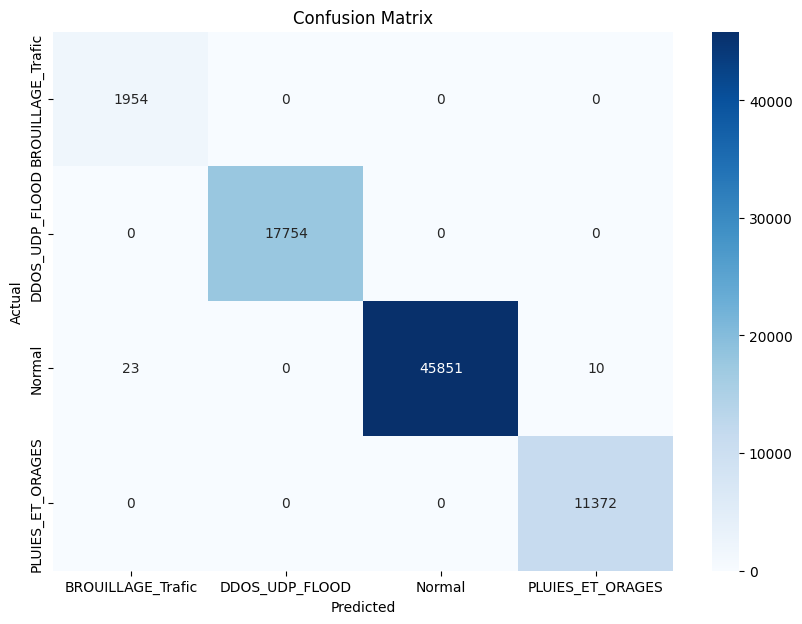

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_test, y_pred)
print(cm)
# Create a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
